<a href="https://colab.research.google.com/github/ibhawna/internship-tasks/blob/main/1_Prediction_using_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bhawna Rathi

**TASK 1 - Prediction using Supervised Machine Learning**

Predict the percentage of an student based on the number of study hours.

What will be predicted score if a student studies for 9.25 hrs/ day?

Importing libraries



In [8]:
# it offers data structures and operations for manipulating numerical tables and time series
import pandas as pd
# used for working with arrays
import numpy as np  
# data visualization and graphical plotting
import matplotlib.pyplot as plt  
# sets the backend of matplotlib to the 'inline' backend: With this backend, 
# the output of plotting commands is displayed inline within frontends
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

Get csv dataset

In [9]:
# Reading the Data 
df = pd.read_csv('http://bit.ly/w-data')
# used to return top n (5 by default) rows of a data frame or series.
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
# Check if there any null value in the Dataset
df.isnull == True

False

In [11]:
df.info()
# method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
# calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Plotting the distribution of scores**

There is no null value in the Dataset so, we can now visualize our Data.

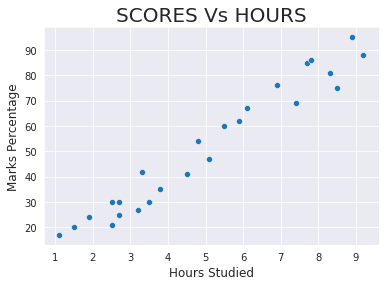

In [38]:
# plot() function draws a line from point to point
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('SCORES Vs HOURS',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

TRAINING THE DATA

1. divide data into input(X) and output(Y)

In [39]:
# it will select till the second last column of the data frame instead of the last column 
X = df.iloc[:, :-1].values  
# it will select only last column of dataframe
Y = df.iloc[:, 1].values

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

2. Using Linear Regression , train model

In [17]:
#  used when we want to predict the value of a variable based on the value of another variable
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)

LinearRegression()

In [18]:
Y_pred = regressor.predict(X_test)

In [40]:
print("---------Model Trained---------")

---------Model Trained---------


Predicting the Percentage of Marks

In [19]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Evaluating the model

we have chosen the mean square error.

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002982


Printing the value of slope and intercept

In [23]:
# intercept indicates the location where it intersects an axis
print('intercept:', regressor.intercept_)
# slope indicates the steepness of a line
print('slope:', regressor.coef_)

intercept: 2.018160041434662
slope: [9.91065648]


Plot the regression line

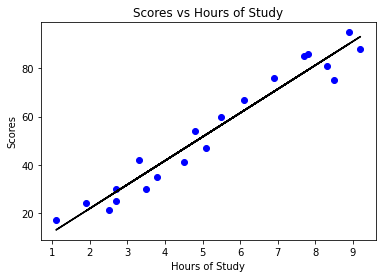

In [24]:
plt.scatter(X_train, Y_train, color = "blue")
plt.plot(X_train, regressor.predict(X_train), color = "black")
plt.title("Scores vs Hours of Study")
plt.xlabel("Hours of Study")
plt.ylabel("Scores")
plt.show()

Visually Comparing the Predicted Marks with the Actual Marks

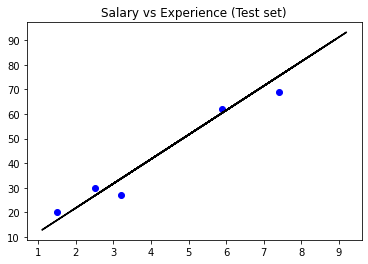

In [25]:
plt.scatter(X_test, Y_test, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('Salary vs Experience (Test set)')
plt.show()

 Predicting the values of scores given the numbers of hours of study

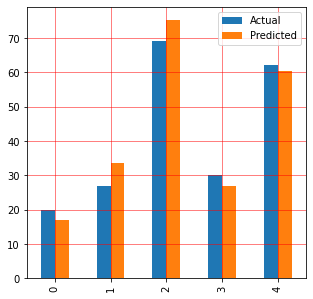

In [26]:
df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

In [42]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(Y_test,Y_pred))

Mean absolute error:  4.183859899002982


Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.

What will be predicted score if a student studies for 9.25 hrs/ day?

In [30]:
# Manually taking input
def score_pred(X,regressor):
    print('No. of hours studied: ', X)
    print('Percentage:', regressor.intercept_ + regressor.coef_ * X)
score_pred(9.25, regressor)

No. of hours studied:  9.25
Percentage: [93.69173249]


According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.